In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Dataset.csv')
df.head()

,batting_team,bowling_team,venue,current_score,is_powerplay,balls_left,wickets_left,current_run_rate,Top_Order,Middle_Order,Lower_Order,Tail,last_five,Death_Overs,final_score
0,South Africa,India,Johannesburg,171,0,15,7,9.771429,0,1,0,0,61,1,219
1,India,South Africa,Cape Town,66,0,71,9,8.081633,1,0,0,0,35,0,172
2,West Indies,Sri Lanka,Pallekele,120,0,9,6,6.486486,0,0,1,0,47,1,129
3,Australia,England,Melbourne,118,0,18,5,6.941176,0,0,1,0,38,1,147
4,South Africa,Sri Lanka,Johannesburg,69,0,56,5,6.468750,0,0,1,0,29,0,113


In [197]:
from sklearn.model_selection import  train_test_split

In [198]:
columnsToDrop = ['batting_team', 'bowling_team', 'venue', 'is_powerplay', 'Top_Order', 'Middle_Order', 'Lower_Order', 'Tail', 'Death_Overs', 'final_score']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=columnsToDrop), df['final_score'], test_size=0.3, random_state=42)

In [217]:
X_train[:5]

,current_score,balls_left,wickets_left,current_run_rate,last_five
15694,115,32,5,7.840909,41
27735,67,77,9,9.348837,52
33072,86,57,9,8.190476,42
1686,66,65,7,7.200000,24
17831,132,12,5,7.333333,45


In [218]:
y_train[:5]

15694    162
27735    157
33072    196
1686     144
17831    139
Name: final_score, dtype: int64

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [204]:
scalePipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

In [202]:
# transformer = ColumnTransformer(transformers=[
#     ('scaling', scalePipeline),
#     ('model', LinearRegression())
# ])

In [205]:
scalePipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [206]:
y_pred2 = scalePipeline.predict(X_test)
y_pred2

array([164.10876032, 134.46273111, 166.01442172, ..., 180.52033046,
       158.439085  , 173.73688119])

In [221]:
testData = np.array([86, 57, 9, 8.190476, 42]).reshape(1, -1)
testData

array([[86.      , 57.      ,  9.      ,  8.190476, 42.      ]])

In [222]:
scalePipeline.predict(testData)

c:\Users\Jonathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([175.0619666])

In [ ]:
X_train.shape

(30228, 5)

In [ ]:
X_test.shape

(12955, 5)

In [ ]:
y_train.shape

(30228,)

In [ ]:
y_test.shape

(12955,)

In [ ]:
scale = StandardScaler()

In [ ]:
X_train_transform = scale.fit_transform(X_train)
X_test_transform = scale.transform(X_test)

In [ ]:
X_test_transform[:2]

array([[-0.75411243,  0.86230016,  1.1086848 , -0.12459647, -0.49036793],
       [-0.8729592 ,  0.37481845,  0.12839042, -1.25047721, -1.16342216]])

In [ ]:
model = LinearRegression()
model.fit(X_train_transform, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_transform)
y_pred

array([164.10876032, 134.46273111, 166.01442172, ..., 180.52033046,
       158.439085  , 173.73688119])

In [ ]:
model.predict([])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Print coefficients
print("Coefficients:")
print(model.coef_)  # Coefficients for each feature
print("Intercept:")
print(model.intercept_)  # Intercept

# Make predictions on training and test sets
y_train_pred = model.predict(X_train_transform)
y_test_pred = model.predict(X_test_transform)

# Evaluate the model's performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print performance metrics
print("\nPerformance Metrics:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training R-squared: {train_r2:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

Coefficients:
[32.99335256 21.59268637  9.12264114  5.35627212  0.33494872]
Intercept:
161.08756781791718

Performance Metrics:
Training RMSE: 18.85
Test RMSE: 18.81
Training R-squared: 0.66
Test R-squared: 0.66


In [ ]:
import matplotlib.pyplot as plt

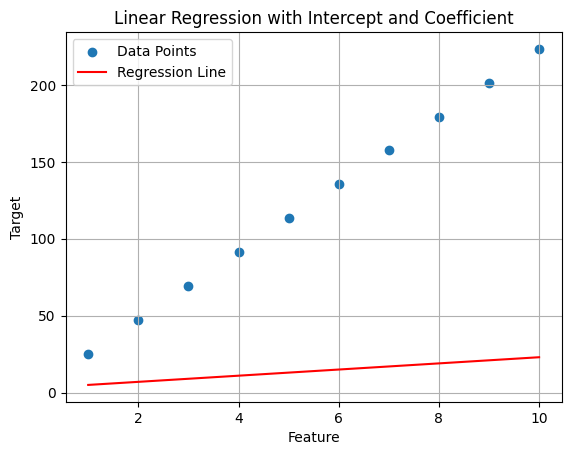

In [ ]:
# Generate some sample data for demonstration purposes
X_feature = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Example feature values
y_target = 22 * X_feature + 3.4  # Example linear relationship: y = 2*X + 3

# Create a linear regression model with the specified coefficients
intercept = 3
coefficient = 2

# Calculate the predicted values using the model
y_predicted = intercept + coefficient * X_feature

# Plot the data points and the regression line
plt.scatter(X_feature, y_target, label="Data Points")
plt.plot(X_feature, y_predicted, color='red', label="Regression Line")

# Add labels and legend
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

# Show the plot
plt.grid(True)
plt.title("Linear Regression with Intercept and Coefficient")
plt.show()


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43183 entries, 0 to 43182
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   current_score     43183 non-null  int64  
 1   is_powerplay      43183 non-null  int64  
 2   balls_left        43183 non-null  int64  
 3   wickets_left      43183 non-null  int64  
 4   current_run_rate  43183 non-null  float64
 5   Top_Order         43183 non-null  int64  
 6   Middle_Order      43183 non-null  int64  
 7   Lower_Order       43183 non-null  int64  
 8   Tail              43183 non-null  int64  
 9   last_five         43183 non-null  int64  
 10  Death_Overs       43183 non-null  int64  
 11  final_score       43183 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 4.0 MB


In [7]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'current_score'}>,
        <Axes: title={'center': 'is_powerplay'}>,
        <Axes: title={'center': 'balls_left'}>],
       [<Axes: title={'center': 'wickets_left'}>,
        <Axes: title={'center': 'current_run_rate'}>,
        <Axes: title={'center': 'Top_Order'}>],
       [<Axes: title={'center': 'Middle_Order'}>,
        <Axes: title={'center': 'Lower_Order'}>,
        <Axes: title={'center': 'Tail'}>],
       [<Axes: title={'center': 'last_five'}>,
        <Axes: title={'center': 'Death_Overs'}>,
        <Axes: title={'center': 'final_score'}>]], dtype=object)

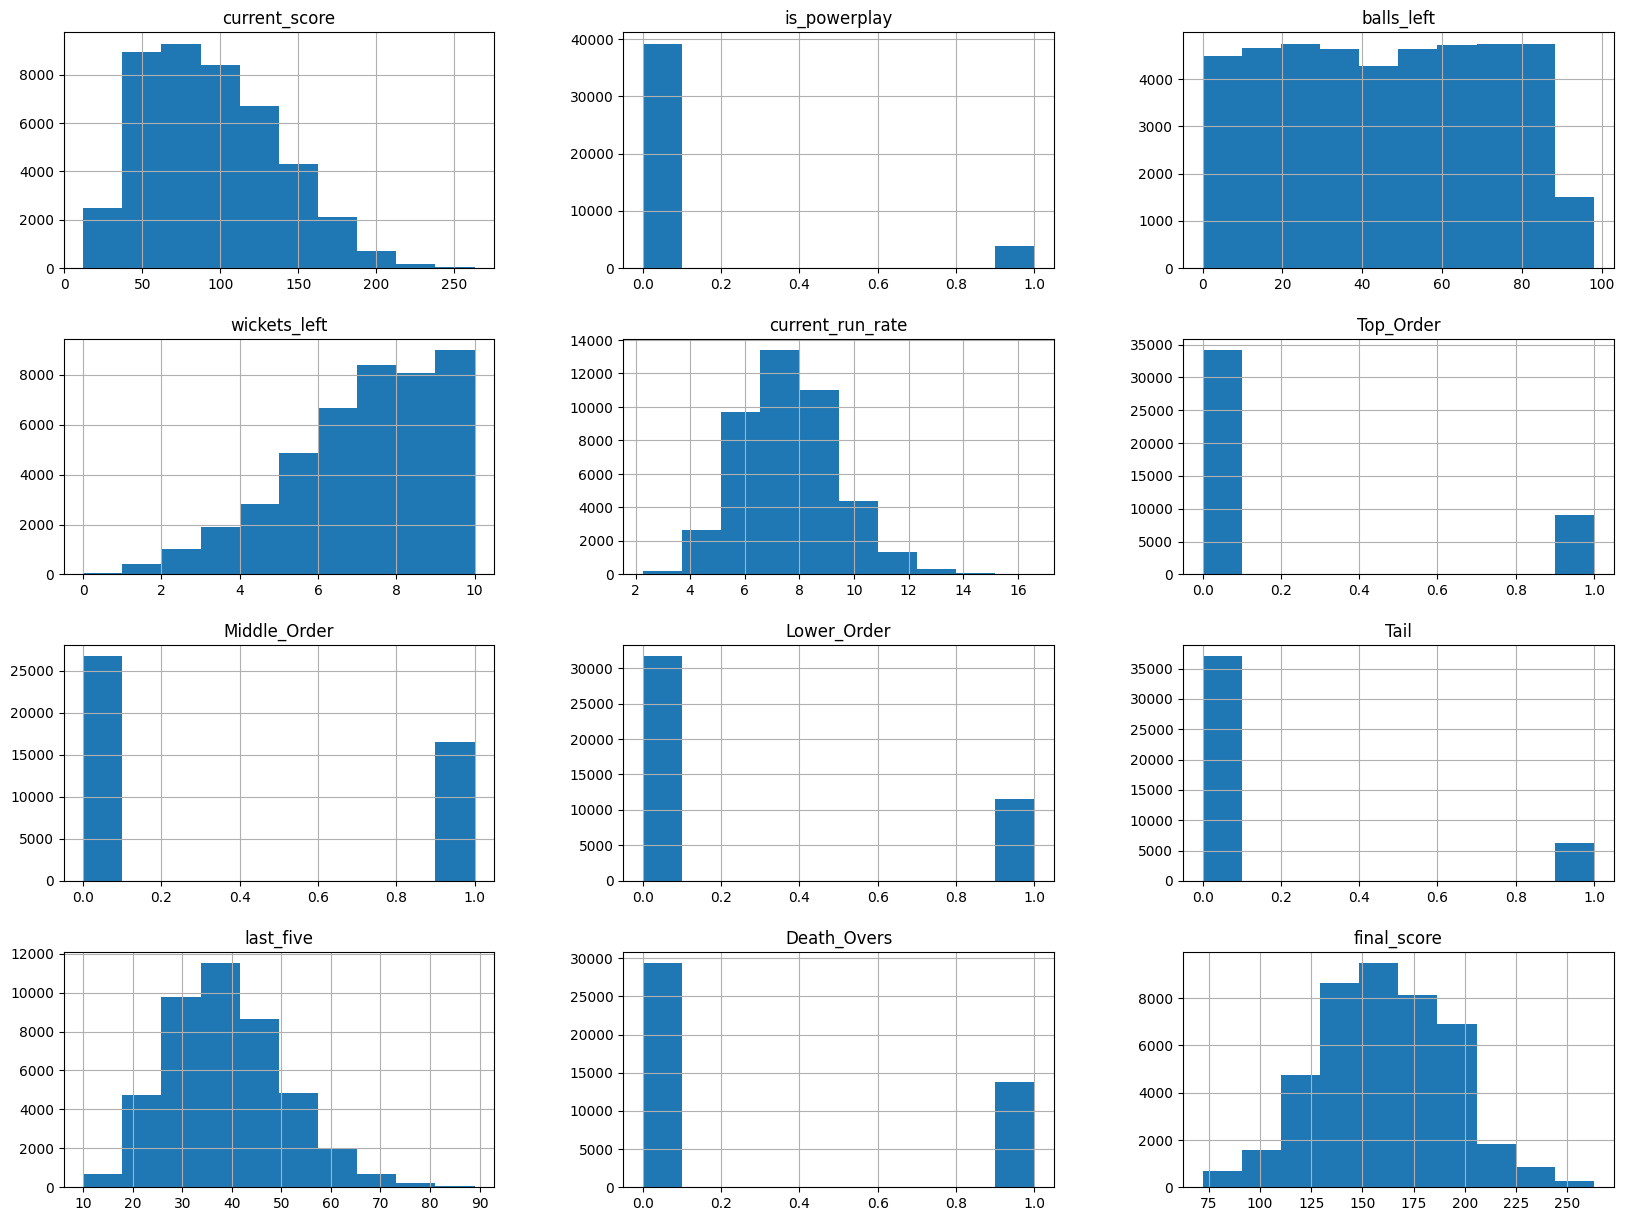

In [231]:
df.hist(bins=10, figsize=(20, 15))

In [4]:
import seaborn as sns

In [19]:
colForCorr = ['current_score', 'is_powerplay', 'balls_left', 'wickets_left', 'current_run_rate', 'Top_Order', 'Middle_Order', 'Lower_Order', 'Tail', 'last_five', 'Death_Overs']
dfForCorr = df[colForCorr]
corr = dfForCorr.corr()
corr
# fig, ax = plt.subplots(figsize=(10, 10))
# sns.heatmap(corr, annot=True)

,current_score,is_powerplay,balls_left,wickets_left,current_run_rate,Top_Order,Middle_Order,Lower_Order,Tail,last_five,Death_Overs
current_score,1.000000,-0.402314,-0.861007,-0.386150,0.541583,-0.296664,-0.110103,0.204991,0.237890,0.519779,0.714434
is_powerplay,-0.402314,1.000000,0.495668,0.300075,0.006167,0.314652,-0.014935,-0.170320,-0.129118,-0.026726,-0.216277
balls_left,-0.861007,0.495668,1.000000,0.670424,-0.081433,0.474245,0.198097,-0.303632,-0.441332,-0.183304,-0.807807
wickets_left,-0.386150,0.300075,0.670424,1.000000,0.304497,0.648881,0.290472,-0.343395,-0.721825,0.247674,-0.563163
current_run_rate,0.541583,0.006167,-0.081433,0.304497,1.000000,0.249501,0.021567,-0.111902,-0.177979,0.768347,0.096192
Top_Order,-0.296664,0.314652,0.474245,0.648881,0.249501,1.000000,-0.402969,-0.309789,-0.209721,0.199148,-0.328543
Middle_Order,-0.110103,-0.014935,0.198097,0.290472,0.021567,-0.402969,1.000000,-0.473939,-0.320848,0.005243,-0.233235
Lower_Order,0.204991,-0.170320,-0.303632,-0.343395,-0.111902,-0.309789,-0.473939,1.000000,-0.246657,-0.067097,0.226040
Tail,0.237890,-0.129118,-0.441332,-0.721825,-0.177979,-0.209721,-0.320848,-0.246657,1.000000,-0.153530,0.419079
last_five,0.519779,-0.026726,-0.183304,0.247674,0.768347,0.199148,0.005243,-0.067097,-0.153530,1.000000,0.208872


1) Other than home ground, where did Sri Lanka play the most number of matches?

2) Which Team has the highest score and opposition against which team did it occur?

3) Which team has the highest run rate?

4) Which batting order (Top Order, Middle Order, Lower Order, or Tail) performed the best in
terms of average runs scored?

5) What is the average pressure score in matches where the Tail was batting?

6) In how many matches was the Aggression Mode set to 1? describe the teams with most
aggressive Matches

7) What is the average runs scored by India in the last five overs (Death Overs) across all
matches?

8) Highest and Average score in Johannesburg?

9) Highest and Average target set against Pakistan?

10) Visualize the highest vs lowest score of a team

11) Average Number of wickets fallen in death Overs?

12) Average target set by Pakistan in their homeland? Note: Homeland may include cities of
Pakistan and UAE

13) describe the average runs scored by each team under pressure

14)  describe the average runs scored by each team in death overs

15) describe the average target by each Team